In [41]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import sqlite3
from datetime import date
from datetime import datetime as dt
import hashlib
import sys
import os
import locale
import re
import requests as rq
import wbdata as wb
from contextlib import contextmanager
import pytz
from datetime import timedelta
from currency_converter import CurrencyConverter
cc=CurrencyConverter()
from matplotlib import pyplot as plt
from sklearn import preprocessing as prep
import numpy as np

project_dir = '/home/mi/Dropbox/prog/python/tradeDB'
os.chdir(project_dir)

from importlib import reload
#from workers import sql
#from workers import api
#from workers.common import read_json, hash_table
import tradeDB

In [10]:
ale= tradeDB.Trader()
pkn= tradeDB.Trader()
wig= tradeDB.Trader()


In [57]:
ale.get(tab='stock',symbol='ale',columns='name;symbol;val;vol;date', start_date='20-05-2023')
pkn.get(tab='stock',symbol='pkn')
wig.get(tab='index',symbol='wig')

In [81]:
ale+pkn+wig
ale.pivot()

In [62]:
print(ale)

           date     to_date     name country   from_date       val  info  \
0    2023-10-30  2023-10-31  ALLEGRO      PL  2022-12-30    29.715  NULL   
1    2023-10-30  2023-10-31  ALLEGRO      PL  2022-12-30    29.715  NULL   
2    2023-10-27  2023-10-31  ALLEGRO      PL  2022-12-30     28.96  NULL   
3    2023-10-27  2023-10-31  ALLEGRO      PL  2022-12-30     28.96  NULL   
4    2023-10-26  2023-10-31  ALLEGRO      PL  2022-12-30      29.0  NULL   
..          ...         ...      ...     ...         ...       ...   ...   
111  2023-05-24  2023-10-30      WIG      PL  2023-05-18  64116.96  NULL   
112  2023-05-23  2023-10-30      WIG      PL  2023-05-18  65419.25  NULL   
113  2023-05-22  2023-10-30      WIG      PL  2023-05-18  65430.97  NULL   
114  2023-05-19  2023-10-30      WIG      PL  2023-05-18  64919.22  NULL   
115  2023-05-18  2023-10-30      WIG      PL  2023-05-18  63629.04  NULL   

    symbol industry      vol indexes  
0      ALE     NULL  2001388   WIG20  
1      AL

In [54]:
d=ale.data
dnp=d.to_numpy()

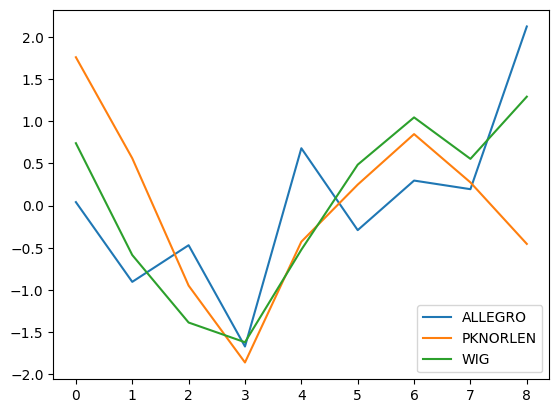

In [53]:
dnp_scale = prep.StandardScaler().fit_transform(dnp)
fig,ax=plt.subplots()
for i in range(len(dnp_scale[0])):
    ax.plot(dnp_scale[:,i],label=d.columns[i])
ax.legend()

<Axes: xlabel='date'>

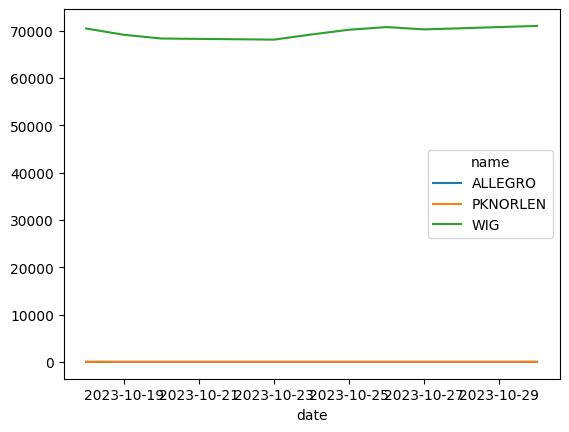

In [25]:
ale.data.plot()